``` 
So far we have seen only limited data which could be easily fitted to RAM. However DNN is performed on huge amount of data which cannot be fitted into the memory. 
Tensorflow makes it easy using Data API - where you just create the object and tell where to get the data and how to transform. Tensorflow takes care of the implementation. 

Off the shelf, data api can read from text files such as CSV, binary files with fixed record size, and binary files that uses Tensorflor TFRecord format which supports varying record size. 
TFRecord is flexible and efficient binary format used based on Protocol Buffers. Reading huge dataset efficiently is not only difficult also data needs to be reprocessed. There can be text fields, categorical fieds. One way to handle this is using custom preprocessing layer.

a. TF Transform (tf.transform)
    - Makes it possible to write single preprocessing function that can be run in batch mode on full training set before training and exported to tf function and incirpoarated into your trained model so that it is deployed in Production so that it can take care of preprocessing on the fly. 

b. TF Dataset (TFDS)
    - Providess convient funciton to. downaload many common datasets of all kinds including large ones from ImageNet.

# the data api

In [1]:
import tensorflow as tf 
X = tf.range(10)

# from_tensor_slices takes a tensor and creates a tf.data.Dataset whose elements are all slices of X 
dataset = tf.data.Dataset.from_tensor_slices(X)
dataset

2025-07-05 19:46:33.418768: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2025-07-05 19:46:33.418848: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-07-05 19:46:33.418865: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2025-07-05 19:46:33.419018: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-07-05 19:46:33.419109: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


<_TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.int32, name=None)>

In [2]:
X

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)>

In [3]:
for item in dataset: 
    print (item)

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)


# Chaining Transformation

``` 
Once you have the dataset you can apply all sort of transformations to it by calling its transformation methods. Each method returns a new dataset 

- repeat() will retrun a new dataset that will repeat the items of the original dataset 3 times. This will not copy all elements 3 times in memory!
- if this function is called without any arugment it will repeat forever, so the code that iterates over the data has to decide when to stop.
- batch() will create a dataset. This one will group the items n times. Final batch will have the size what is left; if you want to get rid of them use drop_remaining=True


In [4]:
dataset_chain = dataset.repeat(3).batch(7)
for item in dataset_chain:
    print (item)

tf.Tensor([0 1 2 3 4 5 6], shape=(7,), dtype=int32)
tf.Tensor([7 8 9 0 1 2 3], shape=(7,), dtype=int32)
tf.Tensor([4 5 6 7 8 9 0], shape=(7,), dtype=int32)
tf.Tensor([1 2 3 4 5 6 7], shape=(7,), dtype=int32)
tf.Tensor([8 9], shape=(2,), dtype=int32)


In [5]:
dataset, dataset_chain

(<_TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.int32, name=None)>,
 <_BatchDataset element_spec=TensorSpec(shape=(None,), dtype=tf.int32, name=None)>)

In [6]:
dataset_chain_2 = dataset.repeat(3).batch(7, drop_remainder=True)
for item in dataset_chain_2:
    print (item)

tf.Tensor([0 1 2 3 4 5 6], shape=(7,), dtype=int32)
tf.Tensor([7 8 9 0 1 2 3], shape=(7,), dtype=int32)
tf.Tensor([4 5 6 7 8 9 0], shape=(7,), dtype=int32)
tf.Tensor([1 2 3 4 5 6 7], shape=(7,), dtype=int32)


In [7]:
dataset_map = dataset_chain.map(lambda x : x ** 2)
dataset_map

<_MapDataset element_spec=TensorSpec(shape=(None,), dtype=tf.int32, name=None)>

In [8]:
for i in dataset_map:
    print (i)

tf.Tensor([ 0  1  4  9 16 25 36], shape=(7,), dtype=int32)
tf.Tensor([49 64 81  0  1  4  9], shape=(7,), dtype=int32)
tf.Tensor([16 25 36 49 64 81  0], shape=(7,), dtype=int32)
tf.Tensor([ 1  4  9 16 25 36 49], shape=(7,), dtype=int32)
tf.Tensor([64 81], shape=(2,), dtype=int32)


``` 
map() applies a transformation to each item. apply() method applies transformation to whole dataset. 

In [9]:
dataset_apply = dataset_chain.apply(tf.data.experimental.unbatch())
for i in dataset_apply:
    print (i)

Instructions for updating:
Use `tf.data.Dataset.unbatch()`.
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.T

In [10]:
# use filter() method 
dataset_filter = dataset.filter(lambda x : x < 5)

In [11]:
for i in dataset_filter:
    print (i)

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)


In [12]:
# if you want to take a look at few items in the dataset 
for i in dataset.take(3):
    print(i)

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)


# Shuffling the Data
Gradient Descent works best when training data are identically distributed and independent. A simple way to ensure this is to shuffle the instances using shuffle() method. 
It will start filling up the buffer space with first items of the datasource. Then whenever asked it will randomly pull one out from buffer until all elements are retrieved iteratively from the datasource.

In [13]:
dataset = tf.data.Dataset.range(10).repeat(3)
dataset_shuffle = dataset.shuffle(buffer_size=5, seed=42).batch(7)
for item in dataset_shuffle:
    print (item) 

tf.Tensor([0 2 3 6 7 9 4], shape=(7,), dtype=int64)
tf.Tensor([5 0 1 1 8 6 5], shape=(7,), dtype=int64)
tf.Tensor([4 8 7 1 2 3 0], shape=(7,), dtype=int64)
tf.Tensor([5 4 2 7 8 9 9], shape=(7,), dtype=int64)
tf.Tensor([3 6], shape=(2,), dtype=int64)


# California Housing Data

In [14]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target.reshape(-1, 1), random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)
X_mean = scaler.mean_
X_std = scaler.scale_

In [15]:
import os 
import numpy as np 

def save_to_multiple_csv_files(data, name_prefix, header=None, n_parts=10):
    housing_dir = os.path.join("DATA/Chapter13", "housing")
    os.makedirs(housing_dir, exist_ok=True)
    path_format = os.path.join(housing_dir, "my_{}_{:02d}.csv")

    filepaths = []
    m = len(data)
    for file_idx, row_indices in enumerate(np.array_split(np.arange(m), n_parts)):
        part_csv = path_format.format(name_prefix, file_idx)
        filepaths.append(part_csv)
        with open(part_csv, "wt", encoding="utf-8") as f:
            if header is not None:
                f.write(header)
                f.write("\n")
            for row_idx in row_indices:
                f.write(",".join([repr(col) for col in data[row_idx]]))
                f.write("\n")
    return filepaths

In [16]:
train_data = np.c_[X_train, y_train]
valid_data = np.c_[X_valid, y_valid]
test_data = np.c_[X_test, y_test]
header_cols = housing.feature_names + ["MedianHouseValue"]
header = ",".join(header_cols)

train_filepaths = save_to_multiple_csv_files(train_data, "train", header, n_parts=20)
valid_filepaths = save_to_multiple_csv_files(valid_data, "valid", header, n_parts=10)
test_filepaths = save_to_multiple_csv_files(test_data, "test", header, n_parts=10)

In [17]:
import pandas as pd

pd.read_csv(train_filepaths[0]).head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedianHouseValue
0,3.5214,15.0,3.049945,1.106548,1447.0,1.605993,37.63,-122.43,1.442
1,5.3275,5.0,6.490060,0.991054,3464.0,3.443340,33.69,-117.39,1.687
2,3.1000,29.0,7.542373,1.591525,1328.0,2.250847,38.44,-122.98,1.621
3,7.1736,12.0,6.289003,0.997442,1054.0,2.695652,33.55,-117.70,2.621
4,2.0549,13.0,5.312457,1.085092,3297.0,2.244384,33.93,-116.93,0.956


In [18]:
with open(train_filepaths[0]) as f:
    for i in range(5):
        print(f.readline(), end="")

MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedianHouseValue
3.5214,15.0,3.0499445061043287,1.106548279689234,1447.0,1.6059933407325193,37.63,-122.43,1.442
5.3275,5.0,6.490059642147117,0.9910536779324056,3464.0,3.4433399602385686,33.69,-117.39,1.687
3.1,29.0,7.5423728813559325,1.5915254237288134,1328.0,2.2508474576271187,38.44,-122.98,1.621
7.1736,12.0,6.289002557544757,0.9974424552429667,1054.0,2.6956521739130435,33.55,-117.7,2.621


In [19]:
# get all file paths for training set
train_filepaths

['DATA/Chapter13/housing/my_train_00.csv',
 'DATA/Chapter13/housing/my_train_01.csv',
 'DATA/Chapter13/housing/my_train_02.csv',
 'DATA/Chapter13/housing/my_train_03.csv',
 'DATA/Chapter13/housing/my_train_04.csv',
 'DATA/Chapter13/housing/my_train_05.csv',
 'DATA/Chapter13/housing/my_train_06.csv',
 'DATA/Chapter13/housing/my_train_07.csv',
 'DATA/Chapter13/housing/my_train_08.csv',
 'DATA/Chapter13/housing/my_train_09.csv',
 'DATA/Chapter13/housing/my_train_10.csv',
 'DATA/Chapter13/housing/my_train_11.csv',
 'DATA/Chapter13/housing/my_train_12.csv',
 'DATA/Chapter13/housing/my_train_13.csv',
 'DATA/Chapter13/housing/my_train_14.csv',
 'DATA/Chapter13/housing/my_train_15.csv',
 'DATA/Chapter13/housing/my_train_16.csv',
 'DATA/Chapter13/housing/my_train_17.csv',
 'DATA/Chapter13/housing/my_train_18.csv',
 'DATA/Chapter13/housing/my_train_19.csv']

#### Build input pipeline

In [20]:
filepath_dataset = tf.data.Dataset.list_files(train_filepaths, seed=42)

In [21]:
for filepath in filepath_dataset:
    print(filepath)

tf.Tensor(b'DATA/Chapter13/housing/my_train_05.csv', shape=(), dtype=string)
tf.Tensor(b'DATA/Chapter13/housing/my_train_16.csv', shape=(), dtype=string)
tf.Tensor(b'DATA/Chapter13/housing/my_train_01.csv', shape=(), dtype=string)
tf.Tensor(b'DATA/Chapter13/housing/my_train_17.csv', shape=(), dtype=string)
tf.Tensor(b'DATA/Chapter13/housing/my_train_00.csv', shape=(), dtype=string)
tf.Tensor(b'DATA/Chapter13/housing/my_train_14.csv', shape=(), dtype=string)
tf.Tensor(b'DATA/Chapter13/housing/my_train_10.csv', shape=(), dtype=string)
tf.Tensor(b'DATA/Chapter13/housing/my_train_02.csv', shape=(), dtype=string)
tf.Tensor(b'DATA/Chapter13/housing/my_train_12.csv', shape=(), dtype=string)
tf.Tensor(b'DATA/Chapter13/housing/my_train_19.csv', shape=(), dtype=string)
tf.Tensor(b'DATA/Chapter13/housing/my_train_07.csv', shape=(), dtype=string)
tf.Tensor(b'DATA/Chapter13/housing/my_train_09.csv', shape=(), dtype=string)
tf.Tensor(b'DATA/Chapter13/housing/my_train_13.csv', shape=(), dtype=string)

```
Read 5 files at a timeand interleave thier lines (skipping the first line of each file, which is header row using skip() method)

In [22]:
n_readers = 5
dataset = filepath_dataset.interleave(
    lambda filepath: tf.data.TextLineDataset(filepath).skip(1),
    cycle_length=n_readers)

In [23]:
dataset

<_InterleaveDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>

``` 
interleave() method will create a dataset that will pull five file paths from the filepath_dataset and for each one it will call the function you gave it (a lambda in the example) to create a new dataset (in this case a TextLineDataset). At this stage there are overall 7 datasets - filepath dataset, interleave dataset and 5 text line dataset created internally by interleave dataset.
If we iterate interleave dataset, it will cycle through 5 Textlinedataset ready one line at a time from each dataset until all datasets are out of items 

In [24]:
for line in dataset.take(5):
    print(line.numpy())

b'4.5909,16.0,5.475877192982456,1.0964912280701755,1357.0,2.9758771929824563,33.63,-117.71,2.418'
b'2.4792,24.0,3.4547038327526134,1.1341463414634145,2251.0,3.921602787456446,34.18,-118.38,2.0'
b'4.2708,45.0,5.121387283236994,0.953757225433526,492.0,2.8439306358381504,37.48,-122.19,2.67'
b'2.1856,41.0,3.7189873417721517,1.0658227848101265,803.0,2.0329113924050635,32.76,-117.12,1.205'
b'4.1812,52.0,5.701388888888889,0.9965277777777778,692.0,2.4027777777777777,33.73,-118.31,3.215'


In [25]:
record_defaults=[0, np.nan, tf.constant(np.nan, dtype=tf.float64), "Hello", tf.constant([])]
parsed_fields = tf.io.decode_csv('1,2,3,4,5', record_defaults)
parsed_fields

[<tf.Tensor: shape=(), dtype=int32, numpy=1>,
 <tf.Tensor: shape=(), dtype=float32, numpy=2.0>,
 <tf.Tensor: shape=(), dtype=float64, numpy=3.0>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'4'>,
 <tf.Tensor: shape=(), dtype=float32, numpy=5.0>]

In [26]:
parsed_fields = tf.io.decode_csv(',,,,5', record_defaults)
parsed_fields

[<tf.Tensor: shape=(), dtype=int32, numpy=0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=nan>,
 <tf.Tensor: shape=(), dtype=float64, numpy=nan>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'Hello'>,
 <tf.Tensor: shape=(), dtype=float32, numpy=5.0>]

In [27]:
try:
    parsed_fields = tf.io.decode_csv(',,,,', record_defaults)
except tf.errors.InvalidArgumentError as ex:
    print(ex)

{{function_node __wrapped__DecodeCSV_OUT_TYPE_5_device_/job:localhost/replica:0/task:0/device:CPU:0}} Field 4 is required but missing in record 0! [Op:DecodeCSV]


In [28]:

try:
    parsed_fields = tf.io.decode_csv('1,2,3,4,5,6,7', record_defaults)
except tf.errors.InvalidArgumentError as ex:
    print(ex)

{{function_node __wrapped__DecodeCSV_OUT_TYPE_5_device_/job:localhost/replica:0/task:0/device:CPU:0}} Expect 5 fields but have 7 in record 0 [Op:DecodeCSV]


In [29]:
X_train.shape

(11610, 8)

In [30]:
[0.] * 8 + [tf.constant([], dtype=tf.float32)]

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 <tf.Tensor: shape=(0,), dtype=float32, numpy=array([], dtype=float32)>]

In [31]:
n_inputs = 8 # X_train.shape[-1]

@tf.function
def preprocess(line):
    ''' function take one line of the csv data '''

    # set defualt to zeroes of type float32, except last column which is out label which is set to tf.float32
    defs = [0.] * n_inputs + [tf.constant([], dtype=tf.float32)]

    # parse the line data 
    fields = tf.io.decode_csv(line, record_defaults=defs)

    # get all 8 columns which are predictor 
    x = tf.stack(fields[:-1])

    # get the lable values 
    y = tf.stack(fields[-1:])

    # return scaled feature and label 
    return (x - X_mean) / X_std, y

In [32]:
# test the function 
preprocess(b'4.2083,44.0,5.3232,0.9171,846.0,2.3370,37.47,-122.2,2.782')

2025-07-05 19:48:27.269411: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


(<tf.Tensor: shape=(8,), dtype=float32, numpy=
 array([ 0.16579157,  1.216324  , -0.05204565, -0.39215982, -0.5277444 ,
        -0.2633488 ,  0.8543046 , -1.3072058 ], dtype=float32)>,
 <tf.Tensor: shape=(1,), dtype=float32, numpy=array([2.782], dtype=float32)>)

In [33]:
def csv_reader_dataset(filepaths, repeat=1, n_readers=5, n_read_threads=None, shuffle_buffer_size=10000, n_parse_threads=5, batch_size=32):

    # list the files and repeat n times
    dataset = tf.data.Dataset.list_files(filepaths).repeat(repeat)

    # now read the dataset with interleave method 
    dataset = dataset.interleave(
        lambda filepath: tf.data.TextLineDataset(filepath).skip(1),
        cycle_length=n_readers, num_parallel_calls=n_read_threads)
    
    # shuffle the dataset 
    dataset = dataset.shuffle(shuffle_buffer_size)

    # get the scaled data and label details 
    dataset = dataset.map(preprocess, num_parallel_calls=n_parse_threads)

    # provide the batch size
    dataset = dataset.batch(batch_size)

    # return prefetched value 
    return dataset.prefetch(1)

In [34]:
tf.random.set_seed(42)

# get the training set 
train_set = csv_reader_dataset(train_filepaths, batch_size=3)

# print features and label
for X_batch, y_batch in train_set.take(2):
    print("X =", X_batch)
    print("y =", y_batch)
    print()

X = tf.Tensor(
[[ 0.5804519  -0.20762321  0.05616303 -0.15191229  0.01343246  0.00604472
   1.2525111  -1.3671792 ]
 [ 5.818099    1.8491895   1.1784915   0.28173092 -1.2496178  -0.3571987
   0.7231292  -1.0023477 ]
 [-0.9253566   0.5834586  -0.7807257  -0.28213993 -0.36530012  0.27389365
  -0.76194876  0.72684526]], shape=(3, 8), dtype=float32)
y = tf.Tensor(
[[1.752]
 [1.313]
 [1.535]], shape=(3, 1), dtype=float32)

X = tf.Tensor(
[[-0.8324941   0.6625668  -0.20741376 -0.18699841 -0.14536144  0.09635526
   0.9807942  -0.67250353]
 [-0.62183803  0.5834586  -0.19862501 -0.3500319  -1.1437552  -0.3363751
   1.107282   -0.8674123 ]
 [ 0.8683102   0.02970133  0.3427381  -0.29872298  0.7124906   0.28026953
  -0.72915536  0.86178064]], shape=(3, 8), dtype=float32)
y = tf.Tensor(
[[0.919]
 [1.028]
 [2.182]], shape=(3, 1), dtype=float32)



### Train the model 

In [35]:
train_set = csv_reader_dataset(train_filepaths, repeat=None)
valid_set = csv_reader_dataset(valid_filepaths)
test_set = csv_reader_dataset(test_filepaths)

In [36]:
from tensorflow import keras 

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1),
])

In [37]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [38]:
batch_size = 32
model.fit(train_set, steps_per_epoch=len(X_train) // batch_size, epochs=10,
          validation_data=valid_set)

Epoch 1/10


2025-07-05 19:48:30.183551: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node SGD/AssignVariableOp.


362/362 [==============================] - 3s 5ms/step - loss: 2.4051 - val_loss: 1.7818
Epoch 2/10
 34/362 [=>............................] - ETA: 1s - loss: 0.7988

2025-07-05 19:48:32.613795: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 610820301554171845
2025-07-05 19:48:32.613810: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 1768347640053758810
2025-07-05 19:48:32.613816: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 18322424744873160000


362/362 [==============================] - 2s 5ms/step - loss: 0.6379 - val_loss: 0.8908
Epoch 3/10
362/362 [==============================] - 2s 5ms/step - loss: 0.5650 - val_loss: 1.2878
Epoch 4/10
362/362 [==============================] - 2s 5ms/step - loss: 0.5495 - val_loss: 1.9558
Epoch 5/10
362/362 [==============================] - 2s 5ms/step - loss: 0.5588 - val_loss: 0.5093
Epoch 6/10
362/362 [==============================] - 2s 5ms/step - loss: 0.5637 - val_loss: 1.5854
Epoch 7/10
362/362 [==============================] - 2s 5ms/step - loss: 0.5021 - val_loss: 5.9597
Epoch 8/10
362/362 [==============================] - 2s 5ms/step - loss: 0.6176 - val_loss: 4.5877
Epoch 9/10
362/362 [==============================] - 2s 5ms/step - loss: 0.5833 - val_loss: 1.3263
Epoch 10/10
362/362 [==============================] - 2s 5ms/step - loss: 0.5621 - val_loss: 0.4955


In [39]:
model.evaluate(test_set, steps=len(X_test) // batch_size)

161/161 [==============================] - 1s 3ms/step - loss: 0.5413


0.5413438677787781

In [40]:
new_set = test_set.map(lambda X, y: X) # we could instead just pass test_set, Keras would ignore the labels
X_new = X_test
model.predict(new_set, steps=len(X_new) // batch_size)

161/161 [==============================] - 0s 2ms/step


array([[3.8209386],
       [2.2199478],
       [0.8164053],
       ...,
       [3.298315 ],
       [1.6755657],
       [3.3452947]], dtype=float32)

In [41]:
optimizer = keras.optimizers.Nadam(learning_rate=0.01)
loss_fn = keras.losses.mse
n_epochs = 5
batch_size = 32
n_steps_per_epoch = len(X_train) // batch_size
total_steps = n_epochs * n_steps_per_epoch
global_step = 0
for X_batch, y_batch in train_set.take(total_steps):
    global_step += 1
    print("\rGlobal step {}/{}".format(global_step, total_steps), end="")
    with tf.GradientTape() as tape:
        y_pred = model(X_batch)
        main_loss = tf.reduce_mean(loss_fn(y_batch, y_pred))
        loss = tf.add_n([main_loss] + model.losses)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

Global step 1810/1810

In [42]:
optimizer = keras.optimizers.Nadam(learning_rate=0.01)
loss_fn = keras.losses.mse

@tf.function
def train(model, n_epochs, batch_size=32,
          n_readers=5, n_read_threads=5, shuffle_buffer_size=10000, n_parse_threads=5):
    train_set = csv_reader_dataset(train_filepaths, repeat=n_epochs, n_readers=n_readers,
                       n_read_threads=n_read_threads, shuffle_buffer_size=shuffle_buffer_size,
                       n_parse_threads=n_parse_threads, batch_size=batch_size)
    for X_batch, y_batch in train_set:
        with tf.GradientTape() as tape:
            y_pred = model(X_batch)
            main_loss = tf.reduce_mean(loss_fn(y_batch, y_pred))
            loss = tf.add_n([main_loss] + model.losses)
        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))

train(model, 5)

In [43]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [44]:
optimizer = keras.optimizers.Nadam(learning_rate=0.01)
loss_fn = keras.losses.mse

@tf.function
def train(model, n_epochs, batch_size=32,
          n_readers=5, n_read_threads=5, shuffle_buffer_size=10000, n_parse_threads=5):
    train_set = csv_reader_dataset(train_filepaths, repeat=n_epochs, n_readers=n_readers,
                       n_read_threads=n_read_threads, shuffle_buffer_size=shuffle_buffer_size,
                       n_parse_threads=n_parse_threads, batch_size=batch_size)
    n_steps_per_epoch = len(X_train) // batch_size
    total_steps = n_epochs * n_steps_per_epoch
    global_step = 0
    for X_batch, y_batch in train_set.take(total_steps):
        global_step += 1
        if tf.equal(global_step % 100, 0):
            tf.print("\rGlobal step", global_step, "/", total_steps)
        with tf.GradientTape() as tape:
            y_pred = model(X_batch)
            main_loss = tf.reduce_mean(loss_fn(y_batch, y_pred))
            loss = tf.add_n([main_loss] + model.losses)
        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))

train(model, 5)

Global step 100 / 1810
Global step 200 / 1810
Global step 300 / 1810
Global step 400 / 1810
Global step 500 / 1810
Global step 600 / 1810
Global step 700 / 1810
Global step 800 / 1810
Global step 900 / 1810
Global step 1000 / 1810
Global step 1100 / 1810
Global step 1200 / 1810
Global step 1300 / 1810
Global step 1400 / 1810
Global step 1500 / 1810
Global step 1600 / 1810
Global step 1700 / 1810
Global step 1800 / 1810


```
short description of each method in the dataset class

In [45]:
for m in dir(tf.data.Dataset):
    if not (m.startswith("_") or m.endswith("_")):
        func = getattr(tf.data.Dataset, m)
        if hasattr(func, "__doc__"):
            print("● {:21s}{}".format(m + "()", func.__doc__.split("\n")[0]))

● apply()              Applies a transformation function to this dataset.
● as_numpy_iterator()  Returns an iterator which converts all elements of the dataset to numpy.
● batch()              Combines consecutive elements of this dataset into batches.
● bucket_by_sequence_length()A transformation that buckets elements in a `Dataset` by length.
● cache()              Caches the elements in this dataset.
● cardinality()        Returns the cardinality of the dataset, if known.
● choose_from_datasets()Creates a dataset that deterministically chooses elements from `datasets`.
● concatenate()        Creates a `Dataset` by concatenating the given dataset with this dataset.
● counter()            Creates a `Dataset` that counts from `start` in steps of size `step`.
● element_spec()       The type specification of an element of this dataset.
● enumerate()          Enumerates the elements of this dataset.
● filter()             Filters this dataset according to `predicate`.
● flat_map()        

# TFRecord Format
- Preferred format in tensorflow to store the large amount of data
- Simple binary format containing sequence of binary records of varying sizes. 
- Can create TFRecord using tf.io.TFRecordWriter clas 

In [46]:
with tf.io.TFRecordWriter("OUTPUT/Chapter13/my_data.tfrecord") as f:
    f.write(b"This is the first record")
    f.write(b"And this is the second record")

In [47]:
filepaths = ["OUTPUT/Chapter13/my_data.tfrecord"]
dataset = tf.data.TFRecordDataset(filepaths)
for item in dataset:
    print(item)

tf.Tensor(b'This is the first record', shape=(), dtype=string)
tf.Tensor(b'And this is the second record', shape=(), dtype=string)


``` 
You can read multiple TFRecord files with just one TFRecordDataset. By default it will read them one at a time, but if you set num_parallel_reads=3, it will read 3 at a time in parallel and interleave their records:

In [48]:
filepaths

['OUTPUT/Chapter13/my_data.tfrecord']

In [49]:
filepaths = ["OUTPUT/Chapter13/my_test_{}.tfrecord".format(i) for i in range(5)]
for i, filepath in enumerate(filepaths):
    with tf.io.TFRecordWriter(filepath) as f:
        for j in range(3):
            f.write("File {} record {}".format(i, j).encode("utf-8"))

dataset = tf.data.TFRecordDataset(filepaths, num_parallel_reads=3)
for item in dataset:
    print(item)

tf.Tensor(b'File 0 record 0', shape=(), dtype=string)
tf.Tensor(b'File 1 record 0', shape=(), dtype=string)
tf.Tensor(b'File 2 record 0', shape=(), dtype=string)
tf.Tensor(b'File 0 record 1', shape=(), dtype=string)
tf.Tensor(b'File 1 record 1', shape=(), dtype=string)
tf.Tensor(b'File 2 record 1', shape=(), dtype=string)
tf.Tensor(b'File 0 record 2', shape=(), dtype=string)
tf.Tensor(b'File 1 record 2', shape=(), dtype=string)
tf.Tensor(b'File 2 record 2', shape=(), dtype=string)
tf.Tensor(b'File 3 record 0', shape=(), dtype=string)
tf.Tensor(b'File 4 record 0', shape=(), dtype=string)
tf.Tensor(b'File 3 record 1', shape=(), dtype=string)
tf.Tensor(b'File 4 record 1', shape=(), dtype=string)
tf.Tensor(b'File 3 record 2', shape=(), dtype=string)
tf.Tensor(b'File 4 record 2', shape=(), dtype=string)


```
Creating compressed TFRecord Files

In [50]:
options = tf.io.TFRecordOptions(compression_type="GZIP")
with tf.io.TFRecordWriter("OUTPUT/Chapter13/my_compressed.tfrecord", options) as f:
    f.write(b"This is the first record")
    f.write(b"And this is the second record")

In [51]:
dataset = tf.data.TFRecordDataset(["OUTPUT/Chapter13/my_compressed.tfrecord"],
                                  compression_type="GZIP")
for item in dataset:
    print(item)

tf.Tensor(b'This is the first record', shape=(), dtype=string)
tf.Tensor(b'And this is the second record', shape=(), dtype=string)


# Brief Intro to Protocol Buffer
- Each record can use any binary format you want, TFRecord files usually contains serialized protocol buffers (also called protobufs). 
- This is portable, extensible and efficient binary format
- Widely used in Google Remote Procedure Call gRPC. 


In [63]:
%%writefile person.proto
syntax = "proto3";
message Person {
  string name = 1;
  int32 id = 2;
  repeated string email = 3;
}

Overwriting person.proto


``` 
proto3 means we are using 3rd version of protobuf format. 
It tells that each Person object (since protobuf objects are meant to be serialized and transferred thats why message precede the Person) have a name of type string, id of type int32 and zero or more email ids each of type string. 1,2,3 are field identifiers. 
Once you have proto file you can compile it using protoc to generate Python classes 
you can install on mac using 
$ brew install protobuf 

In [64]:
!protoc person.proto --python_out=. --descriptor_set_out=person.desc --include_imports

In [65]:
!ls person*

person.desc   person.proto  person_pb2.py


In [67]:
from person_pb2 import Person

person = Person(name="Al", id=123, email=["a@b.com"])  # create a Person
print(person)  # display the Person

name: "Al"
id: 123
email: "a@b.com"



In [68]:
# person name 
person.name

'Al'

In [69]:
s = person.SerializeToString()
s

b'\n\x02Al\x10{\x1a\x07a@b.com'

In [71]:
person2 = Person()
person2.ParseFromString(s)

15

In [72]:
person == person2

True

# Tensorflow Protobuf
```
syntax = "proto3";

message BytesList { repeated bytes value = 1; }
message FloatList { repeated float value = 1 [packed = true]; }
message Int64List { repeated int64 value = 1 [packed = true]; }
message Feature {
    oneof kind {
        BytesList bytes_list = 1;
        FloatList float_list = 2;
        Int64List int64_list = 3;
    }
};
message Features { map<string, Feature> feature = 1; };
message Example { Features features = 1; };

In [73]:
BytesList = tf.train.BytesList
FloatList = tf.train.FloatList
Int64List = tf.train.Int64List
Feature = tf.train.Feature
Features = tf.train.Features
Example = tf.train.Example

person_example = Example(
    features=Features(
        feature={
            "name": Feature(bytes_list=BytesList(value=[b"Alice"])),
            "id": Feature(int64_list=Int64List(value=[123])),
            "emails": Feature(bytes_list=BytesList(value=[b"a@b.com", b"c@d.com"]))
        }))

with tf.io.TFRecordWriter("OUTPUT/Chapter13/my_contacts.tfrecord") as f:
    f.write(person_example.SerializeToString())

In [75]:
feature_description = {
    "name": tf.io.FixedLenFeature([], tf.string, default_value=""),
    "id": tf.io.FixedLenFeature([], tf.int64, default_value=0),
    "emails": tf.io.VarLenFeature(tf.string),
}
for serialized_example in tf.data.TFRecordDataset(["OUTPUT/Chapter13/my_contacts.tfrecord"]):
    parsed_example = tf.io.parse_single_example(serialized_example,
                                                feature_description)

In [76]:
parsed_example

{'emails': SparseTensor(indices=tf.Tensor(
 [[0]
  [1]], shape=(2, 1), dtype=int64), values=tf.Tensor([b'a@b.com' b'c@d.com'], shape=(2,), dtype=string), dense_shape=tf.Tensor([2], shape=(1,), dtype=int64)),
 'id': <tf.Tensor: shape=(), dtype=int64, numpy=123>,
 'name': <tf.Tensor: shape=(), dtype=string, numpy=b'Alice'>}

In [77]:
parsed_example["emails"].values[0]

<tf.Tensor: shape=(), dtype=string, numpy=b'a@b.com'>

### Putting images to TFRecord

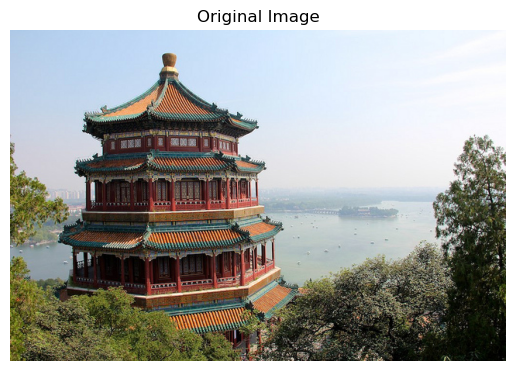

In [78]:
from sklearn.datasets import load_sample_images
import matplotlib.pyplot as plt 
import matplotlib as mpl 

img = load_sample_images()["images"][0]
plt.imshow(img)
plt.axis("off")
plt.title("Original Image")
plt.show()

In [79]:
data = tf.io.encode_jpeg(img)
example_with_image = Example(features=Features(feature={
    "image": Feature(bytes_list=BytesList(value=[data.numpy()]))}))
serialized_example = example_with_image.SerializeToString()

In [80]:
feature_description = { "image": tf.io.VarLenFeature(tf.string) }
example_with_image = tf.io.parse_single_example(serialized_example, feature_description)
decoded_img = tf.io.decode_jpeg(example_with_image["image"].values[0])

In [81]:
decoded_img

<tf.Tensor: shape=(427, 640, 3), dtype=uint8, numpy=
array([[[171, 200, 230],
        [172, 201, 231],
        [172, 201, 231],
        ...,
        [247, 251, 254],
        [248, 252, 255],
        [248, 252, 255]],

       [[169, 198, 228],
        [170, 199, 229],
        [171, 200, 230],
        ...,
        [248, 252, 255],
        [248, 252, 255],
        [248, 252, 255]],

       [[171, 201, 229],
        [171, 201, 229],
        [172, 202, 230],
        ...,
        [252, 253, 255],
        [252, 253, 255],
        [252, 253, 255]],

       ...,

       [[ 85,  84,   4],
        [145, 142,  65],
        [120, 114,  40],
        ...,
        [ 42,  45,  38],
        [  8,  14,   4],
        [  5,  11,   0]],

       [[121, 115,  39],
        [127, 121,  47],
        [122, 114,  42],
        ...,
        [  7,  13,   3],
        [  8,  14,   2],
        [ 22,  28,  16]],

       [[112, 104,  29],
        [103,  95,  22],
        [111, 101,  30],
        ...,
        [ 45,  51,  4

In [82]:
decoded_img = tf.io.decode_image(example_with_image["image"].values[0])

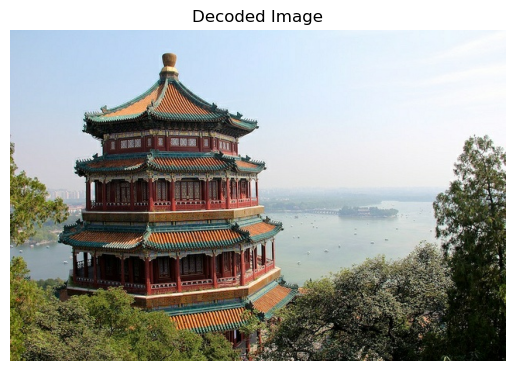

In [83]:
plt.imshow(decoded_img)
plt.title("Decoded Image")
plt.axis("off")
plt.show()

### Putting Tensor and Sparse Tensor in TFRecords 

In [84]:
t = tf.constant([[0., 1.], [2., 3.], [4., 5.]])
s = tf.io.serialize_tensor(t)
s

<tf.Tensor: shape=(), dtype=string, numpy=b'\x08\x01\x12\x08\x12\x02\x08\x03\x12\x02\x08\x02"\x18\x00\x00\x00\x00\x00\x00\x80?\x00\x00\x00@\x00\x00@@\x00\x00\x80@\x00\x00\xa0@'>

In [85]:
tf.io.parse_tensor(s, out_type=tf.float32)

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[0., 1.],
       [2., 3.],
       [4., 5.]], dtype=float32)>

In [86]:
serialized_sparse = tf.io.serialize_sparse(parsed_example["emails"])
serialized_sparse

<tf.Tensor: shape=(3,), dtype=string, numpy=
array([b'\x08\t\x12\x08\x12\x02\x08\x02\x12\x02\x08\x01"\x10\x00\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00',
       b'\x08\x07\x12\x04\x12\x02\x08\x02"\x10\x07\x07a@b.comc@d.com',
       b'\x08\t\x12\x04\x12\x02\x08\x01"\x08\x02\x00\x00\x00\x00\x00\x00\x00'],
      dtype=object)>

In [87]:
BytesList(value=serialized_sparse.numpy())

value: "\010\t\022\010\022\002\010\002\022\002\010\001\"\020\000\000\000\000\000\000\000\000\001\000\000\000\000\000\000\000"
value: "\010\007\022\004\022\002\010\002\"\020\007\007a@b.comc@d.com"
value: "\010\t\022\004\022\002\010\001\"\010\002\000\000\000\000\000\000\000"

In [88]:
dataset = tf.data.TFRecordDataset(["OUTPUT/Chapter13/my_contacts.tfrecord"]).batch(10)
for serialized_examples in dataset:
    parsed_examples = tf.io.parse_example(serialized_examples,
                                          feature_description)

In [89]:

parsed_examples

{'image': SparseTensor(indices=tf.Tensor([], shape=(0, 2), dtype=int64), values=tf.Tensor([], shape=(0,), dtype=string), dense_shape=tf.Tensor([1 0], shape=(2,), dtype=int64))}

# Handling Sequential Data using SequenceExample

In [90]:
FeatureList = tf.train.FeatureList
FeatureLists = tf.train.FeatureLists
SequenceExample = tf.train.SequenceExample

# provide features 
context = Features(feature={
    "author_id": Feature(int64_list=Int64List(value=[123])),
    "title": Feature(bytes_list=BytesList(value=[b"A", b"desert", b"place", b"."])),
    "pub_date": Feature(int64_list=Int64List(value=[1623, 12, 25]))
})

# create content and comment list 
content = [["When", "shall", "we", "three", "meet", "again", "?"],
           ["In", "thunder", ",", "lightning", ",", "or", "in", "rain", "?"]]
comments = [["When", "the", "hurlyburly", "'s", "done", "."],
            ["When", "the", "battle", "'s", "lost", "and", "won", "."]]

# create a method to create list of words 
def words_to_feature(words):
    return Feature(bytes_list=BytesList(value=[word.encode("utf-8")
                                               for word in words]))

# create sentence 
content_features = [words_to_feature(sentence) for sentence in content]
comments_features = [words_to_feature(comment) for comment in comments]


sequence_example = SequenceExample(
    context=context,
    feature_lists=FeatureLists(feature_list={
        "content": FeatureList(feature=content_features),
        "comments": FeatureList(feature=comments_features)
    }))

In [91]:
sequence_example

context {
  feature {
    key: "title"
    value {
      bytes_list {
        value: "A"
        value: "desert"
        value: "place"
        value: "."
      }
    }
  }
  feature {
    key: "pub_date"
    value {
      int64_list {
        value: 1623
        value: 12
        value: 25
      }
    }
  }
  feature {
    key: "author_id"
    value {
      int64_list {
        value: 123
      }
    }
  }
}
feature_lists {
  feature_list {
    key: "content"
    value {
      feature {
        bytes_list {
          value: "When"
          value: "shall"
          value: "we"
          value: "three"
          value: "meet"
          value: "again"
          value: "?"
        }
      }
      feature {
        bytes_list {
          value: "In"
          value: "thunder"
          value: ","
          value: "lightning"
          value: ","
          value: "or"
          value: "in"
          value: "rain"
          value: "?"
        }
      }
    }
  }
  feature_list {
    key: "c

In [92]:
serialized_sequence_example = sequence_example.SerializeToString()


In [93]:
context_feature_descriptions = {
    "author_id": tf.io.FixedLenFeature([], tf.int64, default_value=0),
    "title": tf.io.VarLenFeature(tf.string),
    "pub_date": tf.io.FixedLenFeature([3], tf.int64, default_value=[0, 0, 0]),
}
sequence_feature_descriptions = {
    "content": tf.io.VarLenFeature(tf.string),
    "comments": tf.io.VarLenFeature(tf.string),
}
parsed_context, parsed_feature_lists = tf.io.parse_single_sequence_example(
    serialized_sequence_example, context_feature_descriptions,
    sequence_feature_descriptions)

In [94]:
parsed_context

{'title': SparseTensor(indices=tf.Tensor(
 [[0]
  [1]
  [2]
  [3]], shape=(4, 1), dtype=int64), values=tf.Tensor([b'A' b'desert' b'place' b'.'], shape=(4,), dtype=string), dense_shape=tf.Tensor([4], shape=(1,), dtype=int64)),
 'author_id': <tf.Tensor: shape=(), dtype=int64, numpy=123>,
 'pub_date': <tf.Tensor: shape=(3,), dtype=int64, numpy=array([1623,   12,   25])>}

In [95]:
parsed_context["title"].values

<tf.Tensor: shape=(4,), dtype=string, numpy=array([b'A', b'desert', b'place', b'.'], dtype=object)>

In [96]:
parsed_feature_lists

{'comments': SparseTensor(indices=tf.Tensor(
 [[0 0]
  [0 1]
  [0 2]
  [0 3]
  [0 4]
  [0 5]
  [1 0]
  [1 1]
  [1 2]
  [1 3]
  [1 4]
  [1 5]
  [1 6]
  [1 7]], shape=(14, 2), dtype=int64), values=tf.Tensor(
 [b'When' b'the' b'hurlyburly' b"'s" b'done' b'.' b'When' b'the' b'battle'
  b"'s" b'lost' b'and' b'won' b'.'], shape=(14,), dtype=string), dense_shape=tf.Tensor([2 8], shape=(2,), dtype=int64)),
 'content': SparseTensor(indices=tf.Tensor(
 [[0 0]
  [0 1]
  [0 2]
  [0 3]
  [0 4]
  [0 5]
  [0 6]
  [1 0]
  [1 1]
  [1 2]
  [1 3]
  [1 4]
  [1 5]
  [1 6]
  [1 7]
  [1 8]], shape=(16, 2), dtype=int64), values=tf.Tensor(
 [b'When' b'shall' b'we' b'three' b'meet' b'again' b'?' b'In' b'thunder'
  b',' b'lightning' b',' b'or' b'in' b'rain' b'?'], shape=(16,), dtype=string), dense_shape=tf.Tensor([2 9], shape=(2,), dtype=int64))}

In [97]:
print(tf.RaggedTensor.from_sparse(parsed_feature_lists["content"]))

<tf.RaggedTensor [[b'When', b'shall', b'we', b'three', b'meet', b'again', b'?'],
 [b'In', b'thunder', b',', b'lightning', b',', b'or', b'in', b'rain', b'?']]>


# California Housing Problem

In [98]:
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("DATA/Chapter13", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [99]:
fetch_housing_data()

In [100]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [101]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [102]:
housing_median_age = tf.feature_column.numeric_column("housing_median_age")

Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.


Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.


In [103]:
age_mean, age_std = X_mean[1], X_std[1]  # The median age is column in 1
housing_median_age = tf.feature_column.numeric_column(
    "housing_median_age", normalizer_fn=lambda x: (x - age_mean) / age_std)

In [104]:
median_income = tf.feature_column.numeric_column("median_income")
bucketized_income = tf.feature_column.bucketized_column(
    median_income, boundaries=[1.5, 3., 4.5, 6.])

Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.


Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.


In [105]:
bucketized_income

BucketizedColumn(source_column=NumericColumn(key='median_income', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), boundaries=(1.5, 3.0, 4.5, 6.0))

In [106]:
ocean_prox_vocab = ['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']
ocean_proximity = tf.feature_column.categorical_column_with_vocabulary_list(
    "ocean_proximity", ocean_prox_vocab)

Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.


Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.


In [107]:
ocean_proximity

VocabularyListCategoricalColumn(key='ocean_proximity', vocabulary_list=('<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'), dtype=tf.string, default_value=-1, num_oov_buckets=0)

In [108]:
# Just an example, it's not used later on
city_hash = tf.feature_column.categorical_column_with_hash_bucket(
    "city", hash_bucket_size=1000)
city_hash

Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.


Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.


HashedCategoricalColumn(key='city', hash_bucket_size=1000, dtype=tf.string)

In [109]:

bucketized_age = tf.feature_column.bucketized_column(
    housing_median_age, boundaries=[-1., -0.5, 0., 0.5, 1.]) # age was scaled
age_and_ocean_proximity = tf.feature_column.crossed_column(
    [bucketized_age, ocean_proximity], hash_bucket_size=100)

Instructions for updating:
Use `tf.keras.layers.experimental.preprocessing.HashedCrossing` instead for feature crossing when preprocessing data to train a Keras model.


Instructions for updating:
Use `tf.keras.layers.experimental.preprocessing.HashedCrossing` instead for feature crossing when preprocessing data to train a Keras model.


In [110]:
latitude = tf.feature_column.numeric_column("latitude")
longitude = tf.feature_column.numeric_column("longitude")
bucketized_latitude = tf.feature_column.bucketized_column(
    latitude, boundaries=list(np.linspace(32., 42., 20 - 1)))
bucketized_longitude = tf.feature_column.bucketized_column(
    longitude, boundaries=list(np.linspace(-125., -114., 20 - 1)))
location = tf.feature_column.crossed_column(
    [bucketized_latitude, bucketized_longitude], hash_bucket_size=1000)

In [111]:
ocean_proximity_one_hot = tf.feature_column.indicator_column(ocean_proximity)

Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.


Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.


In [112]:
ocean_proximity_embed = tf.feature_column.embedding_column(ocean_proximity,
                                                           dimension=2)

Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.


Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.


In [113]:

median_house_value = tf.feature_column.numeric_column("median_house_value")

In [114]:
columns = [housing_median_age, median_house_value]
feature_descriptions = tf.feature_column.make_parse_example_spec(columns)
feature_descriptions

Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.


Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.


{'housing_median_age': FixedLenFeature(shape=(1,), dtype=tf.float32, default_value=None),
 'median_house_value': FixedLenFeature(shape=(1,), dtype=tf.float32, default_value=None)}

In [122]:
with tf.io.TFRecordWriter("OUTPUT/Chapter13/my_data_with_features.tfrecords") as f:
    for x, y in zip(X_train[:, 1:2], y_train):
        example = Example(features=Features(feature={
            "housing_median_age": Feature(float_list=FloatList(value=x)),
            "median_house_value": Feature(float_list=FloatList(value=y))
        }))
        f.write(example.SerializeToString())

In [123]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [124]:
def parse_examples(serialized_examples):
    examples = tf.io.parse_example(serialized_examples, feature_descriptions)
    targets = examples.pop("median_house_value") # separate the targets
    return examples, targets

batch_size = 32
dataset = tf.data.TFRecordDataset(["OUTPUT/Chapter13/my_data_with_features.tfrecords"])
dataset = dataset.repeat().shuffle(10000).batch(batch_size).map(parse_examples)

In [125]:

columns_without_target = columns[:-1]
model = keras.models.Sequential([
    keras.layers.DenseFeatures(feature_columns=columns_without_target),
    keras.layers.Dense(1)
])
model.compile(loss="mse",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])
model.fit(dataset, steps_per_epoch=len(X_train) // batch_size, epochs=5)

Epoch 1/5


2025-07-05 20:52:16.749499: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node SGD/AssignVariableOp.


362/362 [==============================] - 2s 5ms/step - loss: 4.1246 - accuracy: 0.0019
Epoch 2/5
362/362 [==============================] - 2s 4ms/step - loss: 2.0009 - accuracy: 0.0027
Epoch 3/5
362/362 [==============================] - 2s 4ms/step - loss: 1.4624 - accuracy: 0.0026
Epoch 4/5
362/362 [==============================] - 2s 4ms/step - loss: 1.3603 - accuracy: 0.0030
Epoch 5/5
362/362 [==============================] - 2s 4ms/step - loss: 1.3484 - accuracy: 0.0038


In [126]:
some_columns = [ocean_proximity_embed, bucketized_income]
dense_features = keras.layers.DenseFeatures(some_columns)
dense_features({
    "ocean_proximity": [["NEAR OCEAN"], ["INLAND"], ["INLAND"]],
    "median_income": [[3.], [7.2], [1.]]
})

<tf.Tensor: shape=(3, 7), dtype=float32, numpy=
array([[ 0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
        -0.77469784,  0.20785998],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.26737335, -0.00367432],
       [ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.26737335, -0.00367432]], dtype=float32)>

# TF Transform

In [128]:
try:
    import tensorflow_transform as tft

    def preprocess(inputs):  # inputs is a batch of input features
        median_age = inputs["housing_median_age"]
        ocean_proximity = inputs["ocean_proximity"]
        standardized_age = tft.scale_to_z_score(median_age - tft.mean(median_age))
        ocean_proximity_id = tft.compute_and_apply_vocabulary(ocean_proximity)
        return {
            "standardized_median_age": standardized_age,
            "ocean_proximity_id": ocean_proximity_id
        }
except ImportError:
    print("TF Transform is not installed. Try running: pip3 install -U tensorflow-transform")

TF Transform is not installed. Try running: pip3 install -U tensorflow-transform


# Excercises

```
Q1: Why to use Data API? 
Ans: Typically DNN problem deals with huge amount of data which cannot be fitted in RAM in single go. Data API provides interface to preprocess huge dataset by loading from multiple sources, transforming them, interleaving records, shuffling, batching and prefetching it. 

Q2. Benefits of splitting large files into smaller multiple files? 
Ans: Makes possible ot shuffle records at coarse level. Also enables to handle large dataset that donot fit on single machine. Simpler to manipulate thousands of small files rather than one huge file. 

Q3. During training how to tell that your input pipeline is bottleneck? 
Ans: USe Tensorboard to visualize profiling data. If GPU is not fully utilized then input pipeline is likely to be bottleneck. You can fix by making sure it reads and preprocess the data in mutliple threads in parallel and perform prefetch few batches. 
You can also try saving dataset into mutliple TFRecords file and if necessary perform some preprocessing ahead of time. 

Q4. Can you save Binary data to TFRecord file or only serialized protocol buffers? 
Ans: TFRecords file is composed of a sequence of arbitrary binary records - you can absolutely store any binary data for each record. However in practise most TFRecords file contains sequences of serailzied protocol buffer. This makes it possible to benefit from advantages of protocol buffers, such as the fact that they read easily across multiple platforms and languages

Q5. Why to fgo through the hassle of converting all your data to the Example protobuf format? Why not use your own protobuf? 
Ans: Example Protobuf format has advantage that Tensorflow providese e.g. parsing without you having to define the format. It is sufficiently flexible to represent instances of most dataset. In case you still need custom protobuf you can create your own and compile it. 

Q6. When using TFRecord; when would you want to activate compression and why not to do systematically? 
Ans: If TFRecord needs to be downloaded in the training script, compression will make file smaller and reduce download time. But if files are located on local - it is better to avoid compression 

Q7. DAta can be preprocessed directly when writing data files or within the tf.data.pipeline or in preprocessing layer within your model or using TF Transform. List few pros and cons of each option? 
Ans: When preprocessing the data while creating the data files: 
        Pros 
        - training script will run faster since it need not require preprocessing on the fly. 
        - Preprocessed data will be smaller than original data - you can save space and enhance the speed. 
        Cons 
        - Not easy to experiment with various preprocessing logic. 
        - If we need data augmentation; you have to materialize many variants in the dataset. 
        - trained model will expect preprocessed data

    If preprocessed using tf.data.pipeline 
        Pros 
        - Easier to tweak the preprocessing logic and apply data augmentation. 
        - tf.data makes it easy to build highly efficient preprocessing pipeline. 
        Cons 
        - processing may slow down things 
        - each training instance will be preprocessed once per epoch 
        - TRained model would expect the preprocessed data 

    Adding Preprocessing layer in the model 
        Pros 
        - Only have to write preprocessing for training and inference once. 
        - On multiple platforms you run without worrying about platform dependent transformation 
        Cons
        - preprocessing will slowdown the training process 
        - You will not benefit from prefetching and parallelism 
    
    Using TF Transform 
        Pros 
        - Preprocessed data is materialized 
        - Each instance is preprocessed once 
        - Preprocessing layer gets generated automatically. 
        Cons 
        - Need to learn how to use the tool

Q8. Name techniques to encode categorical feature? What about text? 
Ans: a. Using lookup and assigning unqiue value to categorical value 
     b. Using one hot encoding technique 
     c. Using embedding 

     Text can make use of embedding technique

Q9. Load Fashion MNIST split to train, test and validation set. Shuffle the training set

In [129]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [130]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [131]:
train_set = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(len(X_train))
valid_set = tf.data.Dataset.from_tensor_slices((X_valid, y_valid))
test_set = tf.data.Dataset.from_tensor_slices((X_test, y_test))

Text(0.5, 1.0, '4')

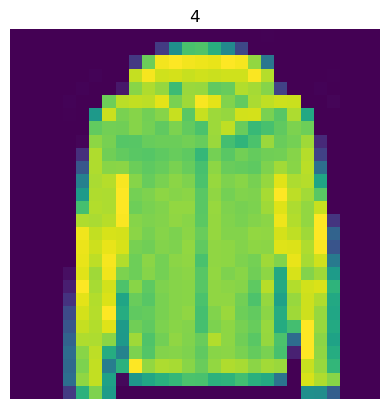

In [139]:
plt.imshow(X_train[0])
plt.axis("off")
plt.title(y_train[0])

In [141]:
# seralize image data 
def create_example(image, label):

    # convert tensor to tensor protobuf 
    image_data = tf.io.serialize_tensor(image)
    
    return Example(
        features=Features(
            feature={
                "image": Feature(bytes_list=BytesList(value=[image_data.numpy()])),
                "label": Feature(int64_list=Int64List(value=[label])),
            }))

In [142]:
for image, label in valid_set.take(1):
    print(create_example(image, label))

features {
  feature {
    key: "label"
    value {
      int64_list {
        value: 9
      }
    }
  }
  feature {
    key: "image"
    value {
      bytes_list {
        value: "\010\004\022\010\022\002\010\034\022\002\010\034\"\220\006\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\001\000\000\rI\000\000\001\004\000\000\000\000\001\001\000\000\000\000\000\000\000\000\000\000\000\000\000\003\000$\210\177>6\000\000\000\001\003\004\000\000\003\000\000\000\000\000\000\000\000\000\000\000\000\006\000f\314\260\206\220{\027\000\000\000\000\014\n\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\233\354\317\262k\234\241m@\027M\202H\017\000\000\000\

In [143]:
# save each to tfrecord file 
from contextlib import ExitStack

def write_tfrecords(name, dataset, n_shards=10):
    paths = ["{}.tfrecord-{:05d}-of-{:05d}".format(name, index, n_shards)
             for index in range(n_shards)]
    with ExitStack() as stack:
        writers = [stack.enter_context(tf.io.TFRecordWriter(path))
                   for path in paths]
        for index, (image, label) in dataset.enumerate():
            shard = index % n_shards
            example = create_example(image, label)
            writers[shard].write(example.SerializeToString())
    return paths

In [144]:
train_filepaths = write_tfrecords("OUTPUT/Chapter13/my_fashion_mnist.train", train_set)
valid_filepaths = write_tfrecords("OUTPUT/Chapter13/my_fashion_mnist.valid", valid_set)
test_filepaths = write_tfrecords("OUTPUT/Chapter13/my_fashion_mnist.test", test_set)

2025-07-05 21:36:29.892036: I tensorflow/core/grappler/optimizers/data/replicate_on_split.cc:32] Running replicate on split optimization
2025-07-05 21:36:37.964525: I tensorflow/core/grappler/optimizers/data/replicate_on_split.cc:32] Running replicate on split optimization
2025-07-05 21:36:38.691723: I tensorflow/core/grappler/optimizers/data/replicate_on_split.cc:32] Running replicate on split optimization


```
Then use tf.data to create an efficient dataset for each set. Finally, use a Keras model to train these datasets, including a preprocessing layer to standardize each input feature. Try to make the input pipeline as efficient as possible, using TensorBoard to visualize profiling data.

In [145]:
def preprocess(tfrecord):
    feature_descriptions = {
        "image": tf.io.FixedLenFeature([], tf.string, default_value=""),
        "label": tf.io.FixedLenFeature([], tf.int64, default_value=-1)
    }
    example = tf.io.parse_single_example(tfrecord, feature_descriptions)
    image = tf.io.parse_tensor(example["image"], out_type=tf.uint8)
    #image = tf.io.decode_jpeg(example["image"])
    image = tf.reshape(image, shape=[28, 28])
    return image, example["label"]

def mnist_dataset(filepaths, n_read_threads=5, shuffle_buffer_size=None,
                  n_parse_threads=5, batch_size=32, cache=True):
    dataset = tf.data.TFRecordDataset(filepaths,
                                      num_parallel_reads=n_read_threads)
    if cache:
        dataset = dataset.cache()
    if shuffle_buffer_size:
        dataset = dataset.shuffle(shuffle_buffer_size)
    dataset = dataset.map(preprocess, num_parallel_calls=n_parse_threads)
    dataset = dataset.batch(batch_size)
    return dataset.prefetch(1)

In [146]:
train_set = mnist_dataset(train_filepaths, shuffle_buffer_size=60000)
valid_set = mnist_dataset(valid_filepaths)
test_set = mnist_dataset(test_filepaths)

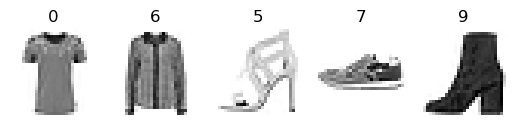

In [147]:
for X, y in train_set.take(1):
    for i in range(5):
        plt.subplot(1, 5, i + 1)
        plt.imshow(X[i].numpy(), cmap="binary")
        plt.axis("off")
        plt.title(str(y[i].numpy()))

In [148]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

class Standardization(keras.layers.Layer):
    def adapt(self, data_sample):
        self.means_ = np.mean(data_sample, axis=0, keepdims=True)
        self.stds_ = np.std(data_sample, axis=0, keepdims=True)
    def call(self, inputs):
        return (inputs - self.means_) / (self.stds_ + keras.backend.epsilon())

standardization = Standardization(input_shape=[28, 28])

In [149]:
# create batch of sample imags
sample_image_batches = train_set.take(100).map(lambda image, label: image)
sample_images = np.concatenate(list(sample_image_batches.as_numpy_iterator()),
                               axis=0).astype(np.float32)
standardization.adapt(sample_images)

# create model 
model = keras.models.Sequential([
    standardization,
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="nadam", metrics=["accuracy"])

In [152]:
from datetime import datetime
logs = os.path.join("DATA/Tensorboard_Logs", "Chapter13_" + datetime.now().strftime("%Y%m%d%H%M%S"))

tensorboard_cb = tf.keras.callbacks.TensorBoard(
    log_dir=logs, histogram_freq=1, profile_batch=10)

model.fit(train_set, epochs=5, validation_data=valid_set,
          callbacks=[tensorboard_cb])

Epoch 1/5


2025-07-05 21:43:59.040835: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:104] Profiler session initializing.
2025-07-05 21:43:59.040852: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:119] Profiler session started.
2025-07-05 21:43:59.041359: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:131] Profiler session tear down.


     28/Unknown - 1s 10ms/step - loss: 1.4216 - accuracy: 0.5513

2025-07-05 21:43:59.888101: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:104] Profiler session initializing.
2025-07-05 21:43:59.888119: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:119] Profiler session started.
2025-07-05 21:43:59.897869: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:70] Profiler session collecting data.
2025-07-05 21:43:59.900999: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:131] Profiler session tear down.
2025-07-05 21:43:59.902984: I external/local_tsl/tsl/profiler/rpc/client/save_profile.cc:144] Collecting XSpace to repository: DATA/Tensorboard_Logs/Chapter13_20250705214359/plugins/profile/2025_07_05_21_43_59/Rohits-MacBook-Pro.local.xplane.pb


   1719/Unknown - 14s 8ms/step - loss: 896.5407 - accuracy: 0.8113

2025-07-05 21:44:12.849559: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 16907470062408165812
2025-07-05 21:44:12.849577: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 10715934873890285577
2025-07-05 21:44:12.849589: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 16990939866804730478
2025-07-05 21:44:12.849596: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 15269088379784257923
2025-07-05 21:44:12.849604: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 6111015331629693834
2025-07-05 21:44:12.849607: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13807676131635632837
2025-07-05 21:44:12.849612: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous rec

1719/1719 [==============================] - 15s 8ms/step - loss: 896.5407 - accuracy: 0.8113 - val_loss: 617.4407 - val_accuracy: 0.8164
Epoch 2/5
   8/1719 [..............................] - ETA: 13s - loss: 0.5697 - accuracy: 0.8633

2025-07-05 21:44:13.576483: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3190444412535113131
2025-07-05 21:44:13.576495: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 8518407556570029523
2025-07-05 21:44:13.576502: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 1768347640053758810
2025-07-05 21:44:13.576505: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 2015708460984313004


1719/1719 [==============================] - 13s 8ms/step - loss: 881.4838 - accuracy: 0.8333 - val_loss: 898.6555 - val_accuracy: 0.8270
Epoch 3/5
1719/1719 [==============================] - 13s 8ms/step - loss: 474.4076 - accuracy: 0.8381 - val_loss: 0.6255 - val_accuracy: 0.8326
Epoch 4/5
1719/1719 [==============================] - 14s 8ms/step - loss: 547.5523 - accuracy: 0.8377 - val_loss: 547.6574 - val_accuracy: 0.8104
Epoch 5/5
1719/1719 [==============================] - 14s 8ms/step - loss: 715.0801 - accuracy: 0.8380 - val_loss: 1065.3032 - val_accuracy: 0.8310


In [153]:
model.evaluate(test_set)

313/313 [==============================] - 2s 5ms/step - loss: 587.8953 - accuracy: 0.8214


2025-07-05 21:58:09.822164: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3190444412535113131
2025-07-05 21:58:09.822181: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 8518407556570029523
2025-07-05 21:58:09.822208: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 1768347640053758810
2025-07-05 21:58:09.822216: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 2015708460984313004


[587.8953247070312, 0.821399986743927]

Q10. Download a dataset, split it, create a tf.data.Dataset to load it and preprocess it efficiently, then build and train a binary classification model containing an Embedding layer.
Download the Large Movie Review Dataset, which contains 50,000 movies reviews from the Internet Movie Database. The data is organized in two directories, train and test, each containing a pos subdirectory with 12,500 positive reviews and a neg subdirectory with 12,500 negative reviews. Each review is stored in a separate text file. There are other files and folders (including preprocessed bag-of-words), but we will ignore them in this exercise.

In [154]:
filepath

'OUTPUT/Chapter13/my_test_4.tfrecord'

In [155]:
from pathlib import Path

DOWNLOAD_ROOT = "http://ai.stanford.edu/~amaas/data/sentiment/"
FILENAME = "aclImdb_v1.tar.gz"
filepath = keras.utils.get_file(FILENAME, DOWNLOAD_ROOT + FILENAME, extract=True)
path = Path(filepath).parent / "aclImdb"
path

84125825/84125825 [==============================] - 292s 3us/step


PosixPath('/Users/rohitabhishek/.keras/datasets/aclImdb')

In [156]:
for name, subdirs, files in os.walk(path):
    indent = len(Path(name).parts) - len(path.parts)
    print("    " * indent + Path(name).parts[-1] + os.sep)
    for index, filename in enumerate(sorted(files)):
        if index == 3:
            print("    " * (indent + 1) + "...")
            break
        print("    " * (indent + 1) + filename)

aclImdb/
    README
    imdb.vocab
    imdbEr.txt
    test/
        labeledBow.feat
        urls_neg.txt
        urls_pos.txt
        neg/
            0_2.txt
            10000_4.txt
            10001_1.txt
            ...
        pos/
            0_10.txt
            10000_7.txt
            10001_9.txt
            ...
    train/
        labeledBow.feat
        unsupBow.feat
        urls_neg.txt
        ...
        neg/
            0_3.txt
            10000_4.txt
            10001_4.txt
            ...
        unsup/
            0_0.txt
            10000_0.txt
            10001_0.txt
            ...
        pos/
            0_9.txt
            10000_8.txt
            10001_10.txt
            ...


In [157]:
def review_paths(dirpath):
    return [str(path) for path in dirpath.glob("*.txt")]

train_pos = review_paths(path / "train" / "pos")
train_neg = review_paths(path / "train" / "neg")
test_valid_pos = review_paths(path / "test" / "pos")
test_valid_neg = review_paths(path / "test" / "neg")

len(train_pos), len(train_neg), len(test_valid_pos), len(test_valid_neg)

(12500, 12500, 12500, 12500)

In [158]:
# Split the test set into a validation set (15,000) and a test set (10,000).
np.random.shuffle(test_valid_pos)

test_pos = test_valid_pos[:5000]
test_neg = test_valid_neg[:5000]
valid_pos = test_valid_pos[5000:]
valid_neg = test_valid_neg[5000:]

In [159]:
def imdb_dataset(filepaths_positive, filepaths_negative):
    reviews = []
    labels = []
    for filepaths, label in ((filepaths_negative, 0), (filepaths_positive, 1)):
        for filepath in filepaths:
            with open(filepath) as review_file:
                reviews.append(review_file.read())
            labels.append(label)
    return tf.data.Dataset.from_tensor_slices(
        (tf.constant(reviews), tf.constant(labels)))

In [160]:
for X, y in imdb_dataset(train_pos, train_neg).take(3):
    print(X)
    print(y)
    print()

tf.Tensor(b"Working with one of the best Shakespeare sources, this film manages to be creditable to it's source, whilst still appealing to a wider audience.<br /><br />Branagh steals the film from under Fishburne's nose, and there's a talented cast on good form.", shape=(), dtype=string)
tf.Tensor(0, shape=(), dtype=int32)

tf.Tensor(b'Well...tremors I, the original started off in 1990 and i found the movie quite enjoyable to watch. however, they proceeded to make tremors II and III. Trust me, those movies started going downhill right after they finished the first one, i mean, ass blasters??? Now, only God himself is capable of answering the question "why in Gods name would they create another one of these dumpster dives of a movie?" Tremors IV cannot be considered a bad movie, in fact it cannot be even considered an epitome of a bad movie, for it lives up to more than that. As i attempted to sit though it, i noticed that my eyes started to bleed, and i hoped profusely that the little 

In [161]:
%timeit -r1 for X, y in imdb_dataset(train_pos, train_neg).repeat(10): pass

49.8 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [162]:
def imdb_dataset(filepaths_positive, filepaths_negative, n_read_threads=5):
    dataset_neg = tf.data.TextLineDataset(filepaths_negative,
                                          num_parallel_reads=n_read_threads)
    dataset_neg = dataset_neg.map(lambda review: (review, 0))
    dataset_pos = tf.data.TextLineDataset(filepaths_positive,
                                          num_parallel_reads=n_read_threads)
    dataset_pos = dataset_pos.map(lambda review: (review, 1))
    return tf.data.Dataset.concatenate(dataset_pos, dataset_neg)

In [163]:
%timeit -r1 for X, y in imdb_dataset(train_pos, train_neg).repeat(10): pass

28.8 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [164]:
%timeit -r1 for X, y in imdb_dataset(train_pos, train_neg).cache().repeat(10): pass

17.3 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [165]:
batch_size = 32

train_set = imdb_dataset(train_pos, train_neg).shuffle(25000).batch(batch_size).prefetch(1)
valid_set = imdb_dataset(valid_pos, valid_neg).batch(batch_size).prefetch(1)
test_set = imdb_dataset(test_pos, test_neg).batch(batch_size).prefetch(1)

In [166]:
def preprocess(X_batch, n_words=50):
    shape = tf.shape(X_batch) * tf.constant([1, 0]) + tf.constant([0, n_words])
    Z = tf.strings.substr(X_batch, 0, 300)
    Z = tf.strings.lower(Z)
    Z = tf.strings.regex_replace(Z, b"<br\\s*/?>", b" ")
    Z = tf.strings.regex_replace(Z, b"[^a-z]", b" ")
    Z = tf.strings.split(Z)
    return Z.to_tensor(shape=shape, default_value=b"<pad>")

X_example = tf.constant(["It's a great, great movie! I loved it.", "It was terrible, run away!!!"])
preprocess(X_example)

<tf.Tensor: shape=(2, 50), dtype=string, numpy=
array([[b'it', b's', b'a', b'great', b'great', b'movie', b'i', b'loved',
        b'it', b'<pad>', b'<pad>', b'<pad>', b'<pad>', b'<pad>',
        b'<pad>', b'<pad>', b'<pad>', b'<pad>', b'<pad>', b'<pad>',
        b'<pad>', b'<pad>', b'<pad>', b'<pad>', b'<pad>', b'<pad>',
        b'<pad>', b'<pad>', b'<pad>', b'<pad>', b'<pad>', b'<pad>',
        b'<pad>', b'<pad>', b'<pad>', b'<pad>', b'<pad>', b'<pad>',
        b'<pad>', b'<pad>', b'<pad>', b'<pad>', b'<pad>', b'<pad>',
        b'<pad>', b'<pad>', b'<pad>', b'<pad>', b'<pad>', b'<pad>'],
       [b'it', b'was', b'terrible', b'run', b'away', b'<pad>', b'<pad>',
        b'<pad>', b'<pad>', b'<pad>', b'<pad>', b'<pad>', b'<pad>',
        b'<pad>', b'<pad>', b'<pad>', b'<pad>', b'<pad>', b'<pad>',
        b'<pad>', b'<pad>', b'<pad>', b'<pad>', b'<pad>', b'<pad>',
        b'<pad>', b'<pad>', b'<pad>', b'<pad>', b'<pad>', b'<pad>',
        b'<pad>', b'<pad>', b'<pad>', b'<pad>', b'<pad>', b'

In [167]:
from collections import Counter

def get_vocabulary(data_sample, max_size=1000):
    preprocessed_reviews = preprocess(data_sample).numpy()
    counter = Counter()
    for words in preprocessed_reviews:
        for word in words:
            if word != b"<pad>":
                counter[word] += 1
    return [b"<pad>"] + [word for word, count in counter.most_common(max_size)]

get_vocabulary(X_example)

[b'<pad>',
 b'it',
 b'great',
 b's',
 b'a',
 b'movie',
 b'i',
 b'loved',
 b'was',
 b'terrible',
 b'run',
 b'away']

In [168]:
class TextVectorization(keras.layers.Layer):
    def __init__(self, max_vocabulary_size=1000, n_oov_buckets=100, dtype=tf.string, **kwargs):
        super().__init__(dtype=dtype, **kwargs)
        self.max_vocabulary_size = max_vocabulary_size
        self.n_oov_buckets = n_oov_buckets

    def adapt(self, data_sample):
        self.vocab = get_vocabulary(data_sample, self.max_vocabulary_size)
        words = tf.constant(self.vocab)
        word_ids = tf.range(len(self.vocab), dtype=tf.int64)
        vocab_init = tf.lookup.KeyValueTensorInitializer(words, word_ids)
        self.table = tf.lookup.StaticVocabularyTable(vocab_init, self.n_oov_buckets)
        
    def call(self, inputs):
        preprocessed_inputs = preprocess(inputs)
        return self.table.lookup(preprocessed_inputs)

In [169]:
text_vectorization = TextVectorization()

text_vectorization.adapt(X_example)
text_vectorization(X_example)

<tf.Tensor: shape=(2, 50), dtype=int64, numpy=
array([[ 1,  3,  4,  2,  2,  5,  6,  7,  1,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0],
       [ 1,  8,  9, 10, 11,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0]])>

In [170]:
max_vocabulary_size = 1000
n_oov_buckets = 100

sample_review_batches = train_set.map(lambda review, label: review)
sample_reviews = np.concatenate(list(sample_review_batches.as_numpy_iterator()),
                                axis=0)

text_vectorization = TextVectorization(max_vocabulary_size, n_oov_buckets,
                                       input_shape=[])
text_vectorization.adapt(sample_reviews)

In [171]:
text_vectorization(X_example)

<tf.Tensor: shape=(2, 50), dtype=int64, numpy=
array([[  9,  14,   2,  64,  64,  12,   5, 256,   9,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  9,  13, 269, 530, 335,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0]])>

In [172]:
text_vectorization.vocab[:10]

[b'<pad>', b'the', b'a', b'of', b'and', b'i', b'to', b'is', b'this', b'it']

In [173]:
simple_example = tf.constant([[1, 3, 1, 0, 0], [2, 2, 0, 0, 0]])
tf.reduce_sum(tf.one_hot(simple_example, 4), axis=1)

<tf.Tensor: shape=(2, 4), dtype=float32, numpy=
array([[2., 2., 0., 1.],
       [3., 0., 2., 0.]], dtype=float32)>

In [174]:
class BagOfWords(keras.layers.Layer):
    def __init__(self, n_tokens, dtype=tf.int32, **kwargs):
        super().__init__(dtype=dtype, **kwargs)
        self.n_tokens = n_tokens
    def call(self, inputs):
        one_hot = tf.one_hot(inputs, self.n_tokens)
        return tf.reduce_sum(one_hot, axis=1)[:, 1:]

In [175]:
bag_of_words = BagOfWords(n_tokens=4)
bag_of_words(simple_example)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[2., 0., 1.],
       [0., 2., 0.]], dtype=float32)>

In [176]:

n_tokens = max_vocabulary_size + n_oov_buckets + 1 # add 1 for <pad>
bag_of_words = BagOfWords(n_tokens)

In [177]:
model = keras.models.Sequential([
    text_vectorization,
    bag_of_words,
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid"),
])
model.compile(loss="binary_crossentropy", optimizer="nadam",
              metrics=["accuracy"])
model.fit(train_set, epochs=5, validation_data=valid_set)

Epoch 1/5
    782/Unknown - 15s 14ms/step - loss: 0.5432 - accuracy: 0.7156

2025-07-05 22:08:47.968762: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 10715934873890285577
2025-07-05 22:08:47.968775: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 17711228971068236749
2025-07-05 22:08:47.968782: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 920350170898374900
2025-07-05 22:08:47.968786: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 10030684812621067272
2025-07-05 22:08:47.968790: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 7655306920078296138
2025-07-05 22:08:47.968793: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 11369312860926805710
2025-07-05 22:08:47.968797: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv 

782/782 [==============================] - 19s 19ms/step - loss: 0.5432 - accuracy: 0.7156 - val_loss: 0.5075 - val_accuracy: 0.7464
Epoch 2/5


2025-07-05 22:08:52.087393: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 14609478669266334905
2025-07-05 22:08:52.087411: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 9318954963994953095
2025-07-05 22:08:52.087415: I tensorflow/core/framework/local_rendezvous.cc:425] Local rendezvous send item cancelled. Key hash: 18024924610370852583
2025-07-05 22:08:52.087432: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 15662764036022233610
2025-07-05 22:08:52.087441: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 1768347640053758810


782/782 [==============================] - 17s 18ms/step - loss: 0.4982 - accuracy: 0.7520 - val_loss: 0.5035 - val_accuracy: 0.7477
Epoch 3/5
782/782 [==============================] - 17s 18ms/step - loss: 0.4919 - accuracy: 0.7574 - val_loss: 0.5035 - val_accuracy: 0.7474
Epoch 4/5
782/782 [==============================] - 17s 18ms/step - loss: 0.4880 - accuracy: 0.7578 - val_loss: 0.4996 - val_accuracy: 0.7485
Epoch 5/5
782/782 [==============================] - 17s 19ms/step - loss: 0.4857 - accuracy: 0.7597 - val_loss: 0.4995 - val_accuracy: 0.7499


#### Using embedding 

In [178]:
def compute_mean_embedding(inputs):
    not_pad = tf.math.count_nonzero(inputs, axis=-1)
    n_words = tf.math.count_nonzero(not_pad, axis=-1, keepdims=True)    
    sqrt_n_words = tf.math.sqrt(tf.cast(n_words, tf.float32))
    return tf.reduce_sum(inputs, axis=1) / sqrt_n_words

another_example = tf.constant([[[1., 2., 3.], [4., 5., 0.], [0., 0., 0.]],
                               [[6., 0., 0.], [0., 0., 0.], [0., 0., 0.]]])
compute_mean_embedding(another_example)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[3.535534 , 4.9497476, 2.1213205],
       [6.       , 0.       , 0.       ]], dtype=float32)>

In [179]:
tf.reduce_mean(another_example[0:1, :2], axis=1) * tf.sqrt(2.)

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[3.535534 , 4.9497476, 2.1213202]], dtype=float32)>

In [180]:

tf.reduce_mean(another_example[1:2, :1], axis=1) * tf.sqrt(1.)

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[6., 0., 0.]], dtype=float32)>

In [181]:
embedding_size = 20

model = keras.models.Sequential([
    text_vectorization,
    keras.layers.Embedding(input_dim=n_tokens,
                           output_dim=embedding_size,
                           mask_zero=True), # <pad> tokens => zero vectors
    keras.layers.Lambda(compute_mean_embedding),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid"),
])

In [182]:

model.compile(loss="binary_crossentropy", optimizer="nadam", metrics=["accuracy"])
model.fit(train_set, epochs=5, validation_data=valid_set)

Epoch 1/5
    782/Unknown - 18s 18ms/step - loss: 0.5573 - accuracy: 0.7055

2025-07-05 22:11:00.949658: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 14498024066274019833
2025-07-05 22:11:00.949684: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 4138288875325442499
2025-07-05 22:11:00.949695: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 164822895542090883
2025-07-05 22:11:00.949703: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 6282706168057339189
2025-07-05 22:11:00.949708: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 7695010592358669767
2025-07-05 22:11:00.949716: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 17628207348319240475
2025-07-05 22:11:00.949744: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv it

782/782 [==============================] - 21s 22ms/step - loss: 0.5573 - accuracy: 0.7055 - val_loss: 0.5039 - val_accuracy: 0.7465
Epoch 2/5


2025-07-05 22:11:04.351744: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 9752554218840664466
2025-07-05 22:11:04.351763: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 11852210696321860135
2025-07-05 22:11:04.351767: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 15110984969940282239
2025-07-05 22:11:04.351773: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3561916976169856171
2025-07-05 22:11:04.351777: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 2224639155802881051
2025-07-05 22:11:04.351783: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 1768347640053758810
2025-07-05 22:11:04.351788: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv i

782/782 [==============================] - 17s 18ms/step - loss: 0.4954 - accuracy: 0.7571 - val_loss: 0.4997 - val_accuracy: 0.7503
Epoch 3/5
782/782 [==============================] - 16s 17ms/step - loss: 0.4863 - accuracy: 0.7613 - val_loss: 0.4996 - val_accuracy: 0.7490
Epoch 4/5
782/782 [==============================] - 17s 17ms/step - loss: 0.4864 - accuracy: 0.7618 - val_loss: 0.5039 - val_accuracy: 0.7425
Epoch 5/5
782/782 [==============================] - 16s 17ms/step - loss: 0.4883 - accuracy: 0.7622 - val_loss: 0.5054 - val_accuracy: 0.7395
